In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd

Sometimes for my own understanding I like to build predictive models (almost) completely manually. 

I enjoy gaining a more visceral understanding by doing so. 

This example below is an implementation of ARIMA (Auto Regression Integrated Moving Average). 

### this was hacked together, don't change the dimensions of the matrices

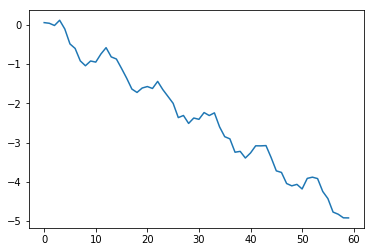

In [2]:
t = np.arange(0, 60)
amplitude = .3
frequency = .1
noise = .1
slope = -.08

x = amplitude * np.sin((2*np.pi*frequency*t)) + slope*t + noise*np.random.randn(t.shape[0])



plt.plot(t, x)

### ARIMA by differencing

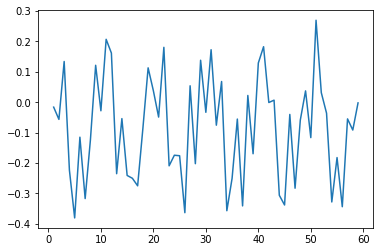

In [3]:
x_diff_1 = x[1:] - x[0:-1]

plt.plot(t[1:], x_diff_1)

### first derivative to make it a stationary system

In [4]:
x_lag_1 = x_diff_1[1:] - x_diff_1[0:-1]
x_lag_1 = x_lag_1[1:].reshape(-1, 1)

x_lag_2 = x_diff_1[2:] - x_diff_1[0: -2]
x_lag_2 = x_lag_2.reshape(-1, 1)

assert x_lag_2.shape == x_lag_1.shape

x_lags = np.concatenate((x_lag_1, x_lag_2), axis=1)

x_now = x_diff_1[x_diff_1.shape[0] - x_lags.shape[0]:].reshape(-1, 1)

x_lags = np.concatenate((x_lags, (x_lags[:, 0]**2).reshape(-1, 1)), axis=1)
x_lags = np.concatenate((x_lags, (x_lags[:, 1]**2).reshape(-1, 1)), axis=1)
x_lags = np.concatenate((x_lags, (x_lags[:, 0] * x_lags[:, 1] * 2).reshape(-1, 1)), axis=1)

x_lags_w_ones = np.concatenate((x_lags, np.ones((x_lags.shape[0], 1))), axis=1)

Using the normal equation to find the betas

solving $X\beta = y$

with $X^TX\beta = X^Ty$

In [5]:
x_t_x = x_lags_w_ones.T.dot(x_lags_w_ones)
x_t_y = x_lags_w_ones.T.dot(x_now)

$(X^TX)^{-1}X^Ty = \beta$

who has time to invert a matrix by hand anyway?

In [6]:
betas = np.linalg.inv(x_t_x).dot(x_t_y)
betas

array([[ 0.34911796],
       [ 0.32291394],
       [-0.07038911],
       [-0.10539134],
       [ 0.10060643],
       [-0.08243048]])

just for differences

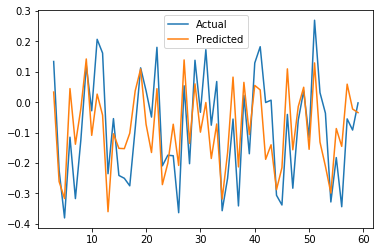

In [7]:
plt.plot(t[3:], x_now, label='Actual')
x_predicted = x_lags_w_ones.dot(betas)
plt.plot(t[3:], x_predicted, label='Predicted')
plt.legend()

but we need to integrate to get back to prediction of more than just differences

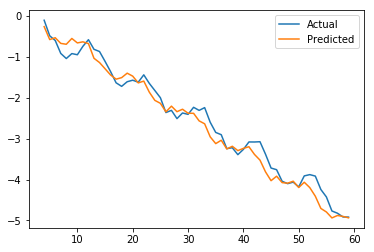

In [8]:
plt.plot(t[4:], x[4:], label='Actual')

plt.plot(t[4:], np.cumsum(x_predicted[1: ]), label='Predicted')
plt.legend()